# Import libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import LearningCurve

# Read data into a dataframe

In [2]:
df = pd.read_excel('Insurance_Data.xlsx')

In [3]:
df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.108590,0.004314,-37.566,0.017364,0.28915,-10.25100,135.120,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.10,1.01770,1
1,1,0.100900,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.900,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.00,0.28359,0
2,2,0.178030,-0.006980,907.270,0.272140,0.45948,0.17327,2298.000,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.20,0.40690,1
3,3,0.152360,0.007259,780.100,0.025179,0.51947,7.49140,112.510,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.10,0.51486,1
4,4,0.116230,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.900,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,0.113640,0.275390,7845.100,0.600110,0.43917,0.74720,126.320,400970.0,-3.138100e+13,...,-21.9860,1.5259,27.78600,-1.63760,242220.00,1.1182,4.048500e+13,3675.10,0.57820,0
3995,3995,-0.003513,0.500780,8309.400,-0.006278,NaN,1.54480,70.646,25663.0,5.518900e+15,...,-15.9800,NaN,-1.23360,8.67930,83210.00,1.2260,3.401300e+15,134.34,0.49055,1
3996,3996,0.081766,0.424560,877.870,0.002953,0.42216,-1.06490,2648.300,1277200.0,5.915200e+13,...,-18.7590,1.4564,0.84176,-2.75740,10693.00,1.1615,-2.807100e+15,8013.90,0.34538,0
3997,3997,0.091935,0.278780,129.290,0.236840,0.29108,-0.99179,350.880,603020.0,-2.860700e+12,...,-2.3197,1.2284,-1.36400,-15.84600,39292.00,1.2008,1.732300e+17,9968.30,0.19644,1


# Step One: Data Preprocessing

### Data Cleaning
<p> Drop the missing and duplicate values in the dataset. </p>

In [4]:
# Drop rows that have missing values
df = df.dropna()

In [5]:
# Drop rows that have duplicate values
df = df.drop_duplicates()

In [6]:
df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
1,1,0.100900,0.29961,11822.000,0.276500,0.459700,-0.837330,1721.900,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.24640,7.575100e+15,1861.000,0.283590,0
8,8,-0.008948,0.33802,503.810,0.601520,0.261760,0.735380,1614.000,408030.0,7.684400e+14,...,-9.5142,2.2176,-1.23750,7.07130,1030.80,1.20400,5.290300e+15,1968.100,0.145930,0
9,9,0.126230,0.17396,1662.000,0.038081,0.000485,0.059909,296.070,-8035.3,4.526300e+15,...,-1.9684,3.9595,19.16900,-0.24498,838.39,1.19680,2.567000e+17,4914.900,0.519760,0
11,11,0.078650,0.38745,1025.900,0.082626,0.267070,-1.476200,2170.100,513560.0,9.716600e+12,...,-17.1010,1.5954,121.02000,-9.33300,45667.00,1.24900,5.059300e+15,5422.300,0.570970,0
14,14,0.072488,0.47341,-22.274,0.002846,0.384460,3.548400,-40.267,739910.0,4.615400e+15,...,-10.3290,1.6152,195.36000,1.05310,1806.40,1.22290,6.537300e+15,591.480,0.300380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,3981,0.076693,0.23914,21858.000,0.099844,0.232680,0.809180,2659.900,250360.0,2.808100e+14,...,-6.4136,1.5137,-2.24610,37.76600,8336.40,0.93325,2.072800e+15,10104.000,0.493210,0
3984,3984,0.100660,0.34550,9604.000,0.013270,0.394410,0.913600,2581.200,17626.0,5.156700e+13,...,-3.9534,3.4041,11.06900,9.83960,765.55,1.26220,9.855700e+16,-57.306,-0.009104,1
3988,3988,0.143850,0.41473,927.500,0.065596,0.450510,0.616990,1050.600,94525.0,-5.543800e+12,...,-4.5942,3.4583,51.16800,-4.41500,143420.00,1.14740,-4.769900e+15,7227.900,1.115300,0
3993,3993,0.108340,0.26236,643.910,0.301660,0.001083,-1.306400,1567.200,-4861.0,6.750600e+13,...,-26.9990,1.5263,34.08900,17.18700,173790.00,1.32070,1.325700e+17,6027.400,0.266360,0


### Data Scaling
<p> It can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm. </p>

In [7]:
# Create scaler object
scale = StandardScaler()

# Drop column id and claim
X = df.drop(columns=['id', 'claim'])

# Scale the data to balance values
scaledX = scale.fit_transform(X)

In [8]:
tDF = pd.DataFrame(scaledX, columns = X.columns)

In [9]:
# Check if value count is balanced, claim is not balanced (way more 0s than 1s)
df['claim'].value_counts()

claim
0    1269
1     205
Name: count, dtype: int64

### Countplot

<Axes: xlabel='claim', ylabel='count'>

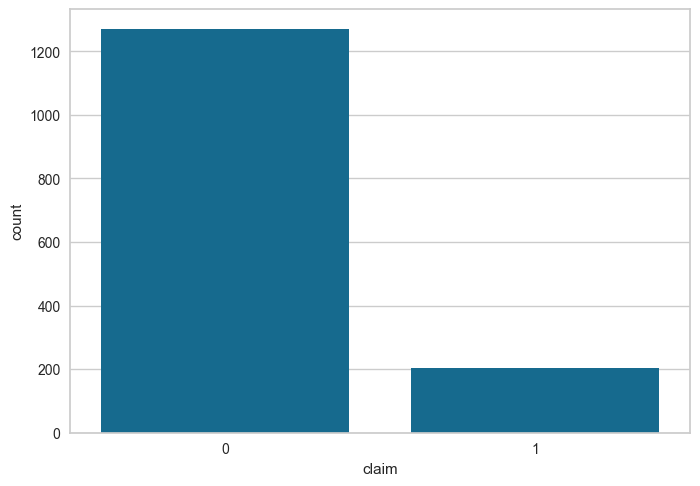

In [46]:
sns.countplot(x ='claim', data = df)

### Oversampling the dataset
<p> It is done to compensate for an imbalance value that is either already present in the data, or likely to develop if a purely random sample were taken. </p>

In [10]:
# Define x (features) and y (target)
x = tDF
y = df['claim']

y = y.reset_index()
y = y.drop(columns=['index'])

# Use oversampling strategy to balance claim values
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the oversample transform
x_over, y_over = oversample.fit_resample(x, y)

In [11]:
# Dataset value count is balanced
y_over.value_counts()

claim
0        1269
1        1269
Name: count, dtype: int64

# Step Three: Feature selection

### Heatmap

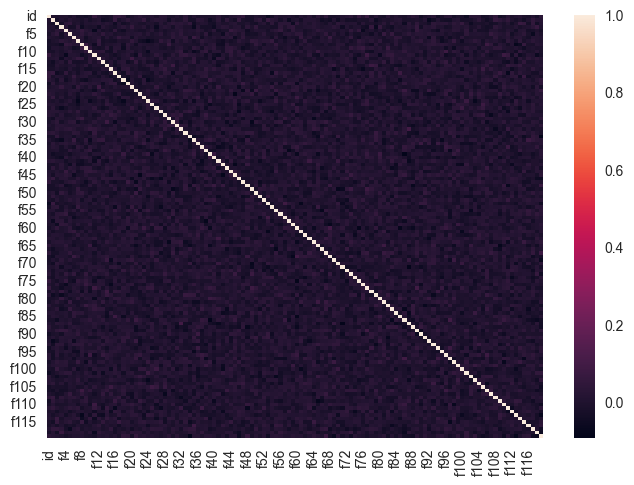

In [12]:
# Plotting correlation heatmap to see which variables have signficance to the target variable, 
# due to the high number of variables it is hard to identify correlation, so feature importance will be used instead
dataplot = sns.heatmap(df.corr()) 

## Feature importance using Random Forest Classifier

### Split dataset

In [13]:
# Splitting the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.1, random_state = 42, shuffle=True)

In [14]:
# Convert to 1d array for fitting
y_train = y_train.values
y_train = y_train.ravel()

### Build model with best parameters

In [15]:
# Search for the best parameters for the model
param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(x_train, y_train)
model = model.best_estimator_

### Train the Random Forest Classifier model

In [16]:
# Fit model with best parameters
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features=0.1, max_samples=0.8,
                       n_estimators=95)

In [17]:
# Get the feature importances
importances = model.feature_importances_
final_df = pd.DataFrame({"Features": pd.DataFrame(x_train).columns, "Importances": importances})
final_df.set_index('Importances')

,Features
Importances,
0.008080,f1
0.007105,f2
0.008596,f3
0.012903,f4
0.006875,f5
...,...
0.006599,f114
0.008657,f115
0.004893,f116


In [18]:
# See importance of feature statistics
final_df['Importances'].describe()

count    118.000000
mean       0.008475
std        0.002846
min        0.004704
25%        0.006752
50%        0.008037
75%        0.009152
max        0.027066
Name: Importances, dtype: float64

### Feature reduction

In [19]:
# Feature reduction, drop features that are below quartile 3 (75%)
df3 = final_df[final_df['Importances'] < final_df['Importances'].describe().iloc[6]]
feats = df3['Features'].tolist()
x_over = x_over.drop(columns=feats)

In [20]:
# Splitting the dataset again after feature reduction
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.1, random_state = 42, shuffle=True)

In [21]:
# Convert to 1d array for fitting
y_train = y_train.values
y_train = y_train.ravel()

In [22]:
# Features reduced from 118 to 30
x_train

,f4,f6,f9,f16,f18,f20,f31,f32,f34,f35,...,f89,f95,f99,f103,f104,f108,f109,f111,f117,f118
1260,0.544038,-0.273148,0.228535,-0.650717,-0.376878,-0.673209,-0.586875,-0.696960,1.831788,-0.740788,...,-0.889798,-0.891669,-1.094187,-0.623782,-0.529168,-0.902279,-1.341848,-0.629996,-0.518293,-1.366625
1477,1.206995,0.305858,-0.737569,-0.655816,0.403759,-0.702072,-0.594581,-0.505915,-0.858123,0.816523,...,0.935042,-0.534343,-0.042977,-0.431715,-0.641003,1.925481,1.465532,1.281710,1.732146,-0.013770
1025,0.343349,0.641953,3.313662,-0.507592,2.134527,-0.714580,-4.035044,-0.411178,0.068900,-0.803031,...,0.002901,-0.976582,-0.455388,-0.023139,-0.592900,-0.174455,-0.447516,-0.742476,-1.110512,-0.758163
1901,-0.816883,-0.341527,-0.757310,1.394576,-0.097023,-0.095004,0.475167,-0.275805,-1.403305,-0.798966,...,-0.255052,-0.638450,-0.282149,-0.639999,-0.283968,1.758132,0.618649,-0.506671,0.199359,-1.348728
2111,-0.787183,0.693640,0.462151,-0.685398,0.135806,-0.725572,-0.591979,-0.075264,-1.080987,-0.748949,...,0.668549,0.459645,-0.639687,0.174460,-0.576886,0.153077,-0.541523,-0.528139,-1.110298,-1.305962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.932992,1.153698,-0.418685,0.088509,1.247504,-0.652689,-0.549394,-0.128218,-0.364027,0.029704,...,-0.483574,-0.513690,-0.876705,-0.614257,1.142993,-0.899603,1.216681,1.280927,1.698566,-1.206952
1095,-1.038074,0.548130,-0.745066,0.156674,0.287497,-0.719096,-0.533706,0.169015,-0.504370,-0.644655,...,-0.963131,1.739800,-0.564703,2.736132,0.760606,2.388523,0.404737,0.165970,-0.746807,-0.367474
1130,0.055872,-0.421356,-0.409145,-0.679568,1.078035,-0.698700,1.317094,-0.572177,0.697783,-0.798801,...,-1.103780,2.429404,-0.769544,-0.361912,-0.249892,-0.819431,0.516893,-0.526238,0.763039,-0.359871
1294,2.318597,0.719581,-0.744102,-0.677036,-0.866623,-0.675601,-1.491690,-0.474232,0.111110,1.709471,...,-1.040645,0.512043,-0.327254,-0.636926,-0.551489,-0.892262,1.260048,-0.401571,-1.167263,-1.142902


### Train model again after feature reduction

In [39]:
# Fit model again with new x and y data
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features=0.1, max_samples=0.8,
                       n_estimators=95)

### Learning Curve visualization

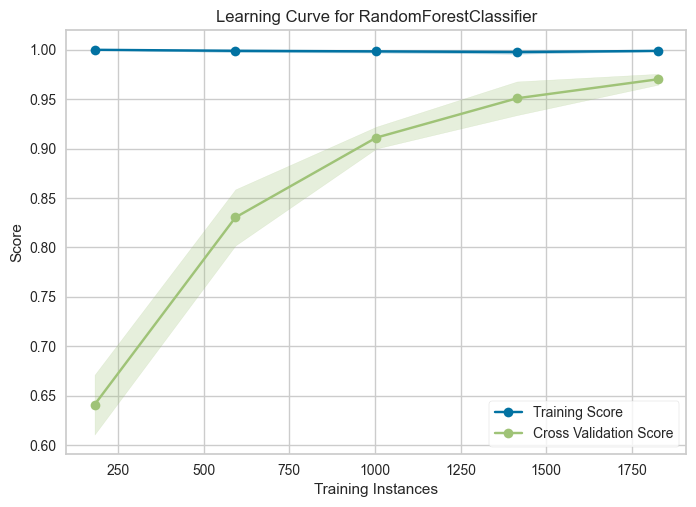

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [24]:
visualizer = LearningCurve(model, scoring='f1_weighted',)

visualizer.fit(x_train, y_train)
visualizer.show()

### Feature importances bar chart

<Axes: >

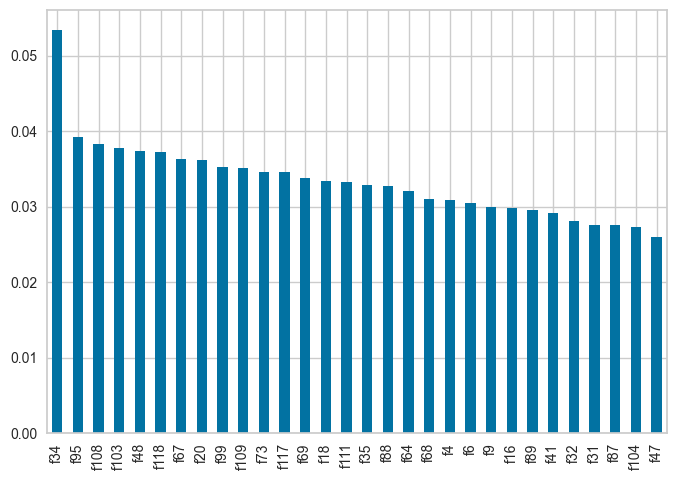

In [25]:
# Create a series containing feature importances from the status model
feature_importances = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importances.plot.bar()

### Perform predictions and show f1_score and accuracy

#### Test dataset

In [26]:
# Predict using test set
testPred = model.predict(x_test)

# Print f1_score and accuracy
print('f1_score: %.2f' % f1_score(y_test, testPred,average='weighted'))
print('accuracy: %.2f' % accuracy_score(y_test, testPred))

f1_score: 0.98
accuracy: 0.98


#### Initial dataset

In [27]:
# Predict using initial dataset
allPred = model.predict(x_over)

# Print f1_score and accuracy
print('f1_score: %.2f' % f1_score(y_over, allPred,average='weighted'))
print('accuracy: %.2f' % accuracy_score(y_over, allPred))

f1_score: 1.00
accuracy: 1.00


In [28]:
# Concatenate the results
final_pred = pd.DataFrame(allPred, columns = ['Predictions'])
result = pd.concat([x_over, y_over], axis=1)
result = pd.concat([result, final_pred], axis=1)

In [29]:
# Check the difference of claim values, small difference means good accuracy, high difference means bad accuracy
print(result['claim'].value_counts())
print(result['Predictions'].value_counts())

claim
0    1269
1    1269
Name: count, dtype: int64
Predictions
0    1271
1    1267
Name: count, dtype: int64


In [30]:
# Print the result showing the actual claims along with the predictions
result

,f4,f6,f9,f16,f18,f20,f31,f32,f34,f35,...,f99,f103,f104,f108,f109,f111,f117,f118,claim,Predictions
0,0.329491,-0.404491,0.954593,-0.676269,-0.850436,-0.605775,1.399609,0.508562,-0.902864,0.080539,...,-0.582084,-0.375477,-0.584402,0.140768,1.928636,2.367708,-0.657024,-0.657692,0,0
1,1.846062,0.369679,-0.418999,-0.675810,1.059220,-0.272322,1.606874,-0.147123,0.273590,-0.735581,...,-0.522184,-0.628780,-0.333576,-0.638914,-0.347017,0.186543,-0.622805,-0.994210,0,0
2,-0.782993,0.037177,1.243053,-0.140883,-0.604059,0.330526,0.954836,-0.588874,0.767776,2.933092,...,-0.950109,2.442947,-0.495024,1.830072,-1.365516,2.134140,0.318728,-0.080360,0,0
3,-0.575142,-0.718976,-0.754572,-0.600164,-0.360215,-0.680823,0.808968,2.241629,0.460434,-0.785621,...,0.154107,-0.619554,-0.588849,0.617213,-1.142648,-0.509131,0.480848,0.044826,0,0
4,-0.947404,1.754394,1.282460,-0.415504,-1.101061,-0.686481,0.646649,-0.795111,0.943503,0.409126,...,-0.172690,-0.638480,-0.579224,1.929529,-0.520452,-0.486993,-1.062649,-0.616648,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,-0.654652,-0.613634,1.004085,-0.248920,-0.089071,-0.712967,0.836473,-0.137918,-1.610759,-0.601158,...,-0.335155,0.281634,-0.560755,-0.308652,-0.932066,-0.412081,0.087627,-0.892394,1,1
2534,-0.548494,0.405899,-0.702487,2.324706,-0.355023,-0.714187,0.878578,3.797228,-0.950648,-0.791977,...,-0.719268,-0.066304,3.493619,-0.577434,0.455785,0.792099,-1.211180,-1.222465,1,1
2535,-0.838449,-0.070370,1.084228,-0.229995,-0.088894,-0.708206,0.875580,-0.526359,-1.500946,-0.768589,...,-0.837633,0.195433,-0.565494,-0.900555,-1.112311,1.586612,0.644661,-0.298048,1,1
2536,-0.947404,1.754394,1.282460,-0.415504,-1.101061,-0.686481,0.646649,-0.795111,0.943503,0.409126,...,-0.172690,-0.638480,-0.579224,1.929529,-0.520452,-0.486993,-1.062649,-0.616648,1,1


## Save to excel or csv

In [58]:
result.to_excel('insurance_predictions.xlsx')

In [57]:
result.to_csv('insurance_predictions.csv')

# For specific predictions

In [ ]:
# Check features that are used
x_over.columns

In [ ]:
#Assign specific values to predict claim (you need to assign it to a certain value like in the rows)
predVar = [['f16', 'f17', 'f29', 'f34', 'f37', 'f46', 'f48', 'f53', 'f55', 'f64',
       'f67', 'f68', 'f69', 'f80', 'f82', 'f88', 'f89', 'f93', 'f95', 'f99',
       'f100', 'f105', 'f107', 'f108', 'f109', 'f110', 'f111', 'f113', 'f117',
       'f118']]
specificPred = pd.DataFrame(statusVar, columns=x_over.columns) 

In [ ]:
# Predict the result
specificRes = model.predict(specificPred)

In [ ]:
# Print the result
specificRes